In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import datasets
import pandas as pd
import seaborn as sns


In [4]:
boston = datasets.load_boston()

In [5]:
df = pd.DataFrame(boston.data, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
                                        'LSTAT',])
df['MEDV'] = boston.target

In [6]:
norm_df = (df-df.min())/(df.max()-df.min())

In [7]:
norm_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


# Correlation

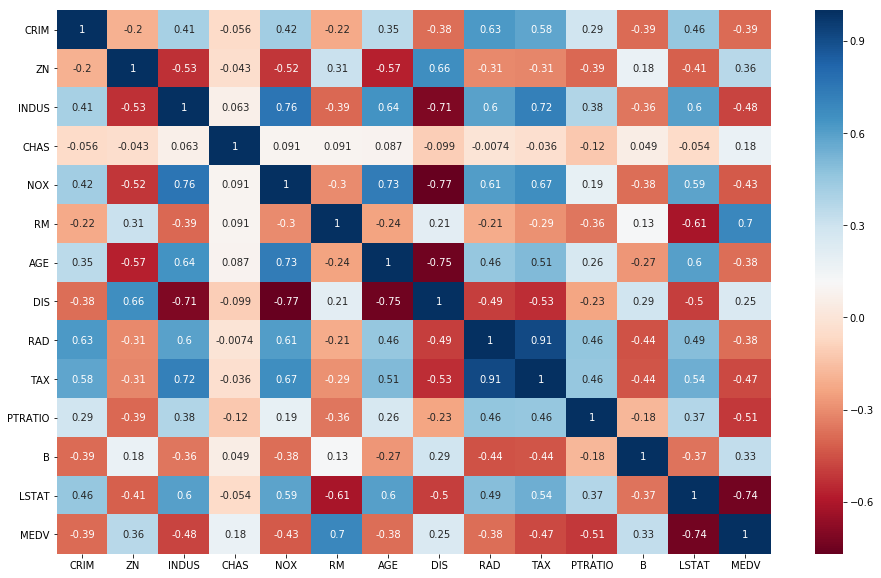

In [8]:
ax, fig = plt.subplots(figsize = (16,10))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.show()

In [9]:
def normal_equation(x,y):
    return np.matmul(np.matmul(np.linalg.inv(x.T@x),x.T), y)

In [10]:
def generate_theta(x):
    return np.random.rand(x.shape[1],1)
#     return np.zeros(x.shape[1]).reshape(14,1)

In [27]:
features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
                                        'LSTAT']
X_b = np.c_[np.ones((len(norm_df[features]), 1)), norm_df[features].values]
# X_b = np.c_[df['LSTAT'].values]
X_b.shape
y = np.c_[norm_df['MEDV'].values]

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_b, y, test_size = 0.2, random_state = 23)

In [29]:
def generate_noise_matrix(alpha,dim1,dim2):
    return 1/alpha * np.random.randn(dim1, dim2)


def add_some_noise(x, alpha):
    noise=generate_noise_matrix(alpha, x.shape[0], x.shape[1])
    return x+noise

X_train_noise = add_some_noise(X_train,10**3)


In [30]:
theta = generate_theta(X_train)


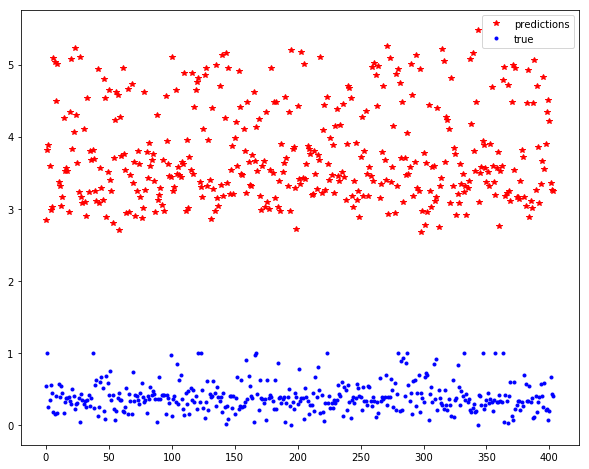

In [31]:
ax, fig = plt.subplots(figsize = (10,8))
plt.plot(X_train@theta, 'r.', marker='*')
plt.plot(Y_train, 'b.')
plt.legend(['predictions', 'true'])
plt.show()

$MSE = \sum_{i=1}^n{(y - y_{pred})^2} = \frac{1}{n}\sum_{i=1}^n{(y - x@\theta)^2}$

$MSE' = \frac{1}{n}\sum_{i=1}^n{2x^T(x@\theta - y)}$

In [32]:
def gradient(x,y,w):
    gradient = np.zeros(x.shape[1]).reshape(14,1)
    for j in range(x.shape[1]):
        res = 0
        for i in range(x.shape[0]):
            res += (x[i][j]*w[j] - y[i])*x[i][j]
        gradient[j] = 2 / x.shape[0] * res
    return gradient



def true_gradient(x,y,w):
    return 2*x.T@(x@w - y) 
    
    

def gradient_descent(x,y,alpha,w,iterations):
    mse_array = []
    iterations_array = []
    for i in range(1, iterations):
        mse_array.append(mse(x@w, y))
        iterations_array.append(i)
        print('ites is {} and mse is {}'.format(i,mse(x@w,y)))
        w -= alpha * true_gradient(x,y,w)
    return w, mse_array, iterations_array

# result_theta, grad_array, grad_iters = gradient_descent(X_train, Y_train, 8*10**-4, theta, 3000)

In [33]:
def sgd_gradient(x,y,w):
    i = np.random.randint(1, x.shape[0])
    x = np.c_[x[i]]
    return 2*x@(x.T@w - y[i])


def sgd(x,y,alpha,w,iterations):
    previous_mse = mse(x@w, y)
    save_w = w
    mse_array = []
    iterations_array = []
    for i in range(1, iterations):
        mse_array.append(mse(x@w, y))
        iterations_array.append(i)
        if i % 10000 == 0:
            current_mse = mse(x@w, y)
            if current_mse > previous_mse:
                print('curr > prev', current_mse)
                alpha /= 2
                w = save_w
            if 0 <= previous_mse - current_mse <= 10**-3:
                print('alpha is ', alpha)
                alpha *= 2
            print('iter is {} and mse is {}'.format(i, mse(x@w, y)))
            save_w = w
            previous_mse = current_mse
        w -= alpha * sgd_gradient(x,y,w)
    return w, mse_array, iterations_array

In [34]:
theta_original = []
theta_noise = []
for i in [0,1,2,3,4,5]:
    theta = generate_theta(X_train)
    theta_original.append(theta)
    theta_noise.append(theta)
alpha_original = [5*10**-1,10**0, 5*10**0, 10**1, 10**2,10**3]
alpha_noise = alpha_original

In [35]:
result_original, sgd_original_array, sgd_original_iters = sgd(X_train,
                                                                 Y_train,0.0008, theta_original[i] , 500000)


iter is 10000 and mse is 0.03154727355381133
iter is 20000 and mse is 0.020931983755922062
iter is 30000 and mse is 0.016991104621973552
iter is 40000 and mse is 0.015082646131027394
alpha is  0.0008
iter is 50000 and mse is 0.01417357122446513
iter is 60000 and mse is 0.013128725699892044
alpha is  0.0016
iter is 70000 and mse is 0.012463067040576937
alpha is  0.0032
iter is 80000 and mse is 0.011811696190912867
alpha is  0.0064
iter is 90000 and mse is 0.01130080206385496
alpha is  0.0128
iter is 100000 and mse is 0.010990884915819532
curr > prev 0.011256872857209216
iter is 110000 and mse is 0.011256872857209216
curr > prev 0.01212553945023518
iter is 120000 and mse is 0.01212553945023518
iter is 130000 and mse is 0.011019393723202512
curr > prev 0.01114312698582681
iter is 140000 and mse is 0.01114312698582681
curr > prev 0.01133826551811369
iter is 150000 and mse is 0.01133826551811369
alpha is  0.0016
iter is 160000 and mse is 0.01090923016777396
curr > prev 0.01103370396412493
i

In [36]:
result_noise = []
sgd_noise_array = []
sgd_noise_iters = []
for i in [0,1,2,3,4,5]:
    result_noise1, sgd_noise_array1, sgd_noise_iters1 = sgd(add_some_noise(X_train, alpha_noise[i]),
                                                                           Y_train,0.0008, theta_noise[i] , 500000)
    result_noise.append(result_noise1)
    sgd_noise_array.append(sgd_noise_array1)
    sgd_noise_iters.append(sgd_noise_iters1)
                            

iter is 10000 and mse is 0.12062639424461115
iter is 20000 and mse is 0.11815604730176435
curr > prev 0.12025901812742172
iter is 30000 and mse is 0.12025901812742172
iter is 40000 and mse is 0.1187521429451114
iter is 50000 and mse is 0.1175244002292353
curr > prev 0.1178450333989799
iter is 60000 and mse is 0.1178450333989799
iter is 70000 and mse is 0.11673227214495766
curr > prev 0.1170331393320844
iter is 80000 and mse is 0.1170331393320844
alpha is  0.0001
iter is 90000 and mse is 0.11657011190413065
curr > prev 0.11671973812546435
iter is 100000 and mse is 0.11671973812546435
curr > prev 0.11672098546107454
iter is 110000 and mse is 0.11672098546107454
alpha is  5e-05
iter is 120000 and mse is 0.11609090102002284
curr > prev 0.1166573561807945
iter is 130000 and mse is 0.1166573561807945
alpha is  5e-05
iter is 140000 and mse is 0.11624135218248607
curr > prev 0.11648890129676083
iter is 150000 and mse is 0.11648890129676083
curr > prev 0.11658795741003367
iter is 160000 and mse

alpha is  0.0016
iter is 240000 and mse is 0.02563484766835831
curr > prev 0.025799436428616866
iter is 250000 and mse is 0.025799436428616866
alpha is  0.0016
iter is 260000 and mse is 0.025578398673688718
curr > prev 0.026151884236669677
iter is 270000 and mse is 0.026151884236669677
curr > prev 0.026254268455837965
iter is 280000 and mse is 0.026254268455837965
alpha is  0.0008
iter is 290000 and mse is 0.02564634688462378
curr > prev 0.026901153688840808
iter is 300000 and mse is 0.026901153688840808
iter is 310000 and mse is 0.025661342053466322
alpha is  0.0008
iter is 320000 and mse is 0.02562791328871261
curr > prev 0.025756197938253237
iter is 330000 and mse is 0.025756197938253237
alpha is  0.0008
iter is 340000 and mse is 0.02560018158584979
curr > prev 0.025965172871810605
iter is 350000 and mse is 0.025965172871810605
alpha is  0.0008
iter is 360000 and mse is 0.025644758443067475
curr > prev 0.02617366739293688
iter is 370000 and mse is 0.02617366739293688
alpha is  0.000

curr > prev 0.010870234816030113
iter is 470000 and mse is 0.010870234816030113
alpha is  5e-05
iter is 480000 and mse is 0.01086611339058703
curr > prev 0.010900865063349505
iter is 490000 and mse is 0.010900865063349505
curr > prev 0.010905328774218476
iter is 10000 and mse is 0.010905328774218476
alpha is  0.0004
iter is 20000 and mse is 0.010886745439640015
curr > prev 0.01088699301197918
iter is 30000 and mse is 0.01088699301197918
curr > prev 0.010887981044877426
iter is 40000 and mse is 0.010887981044877426
curr > prev 0.01088976545641973
iter is 50000 and mse is 0.01088976545641973
curr > prev 0.010895579110328128
iter is 60000 and mse is 0.010895579110328128
alpha is  5e-05
iter is 70000 and mse is 0.010894945857153317
alpha is  0.0001
iter is 80000 and mse is 0.010893180349053953
curr > prev 0.010902187239188238
iter is 90000 and mse is 0.010902187239188238
curr > prev 0.010903276673626644
iter is 100000 and mse is 0.010903276673626644
alpha is  5e-05
iter is 110000 and mse i

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: Attempted to set

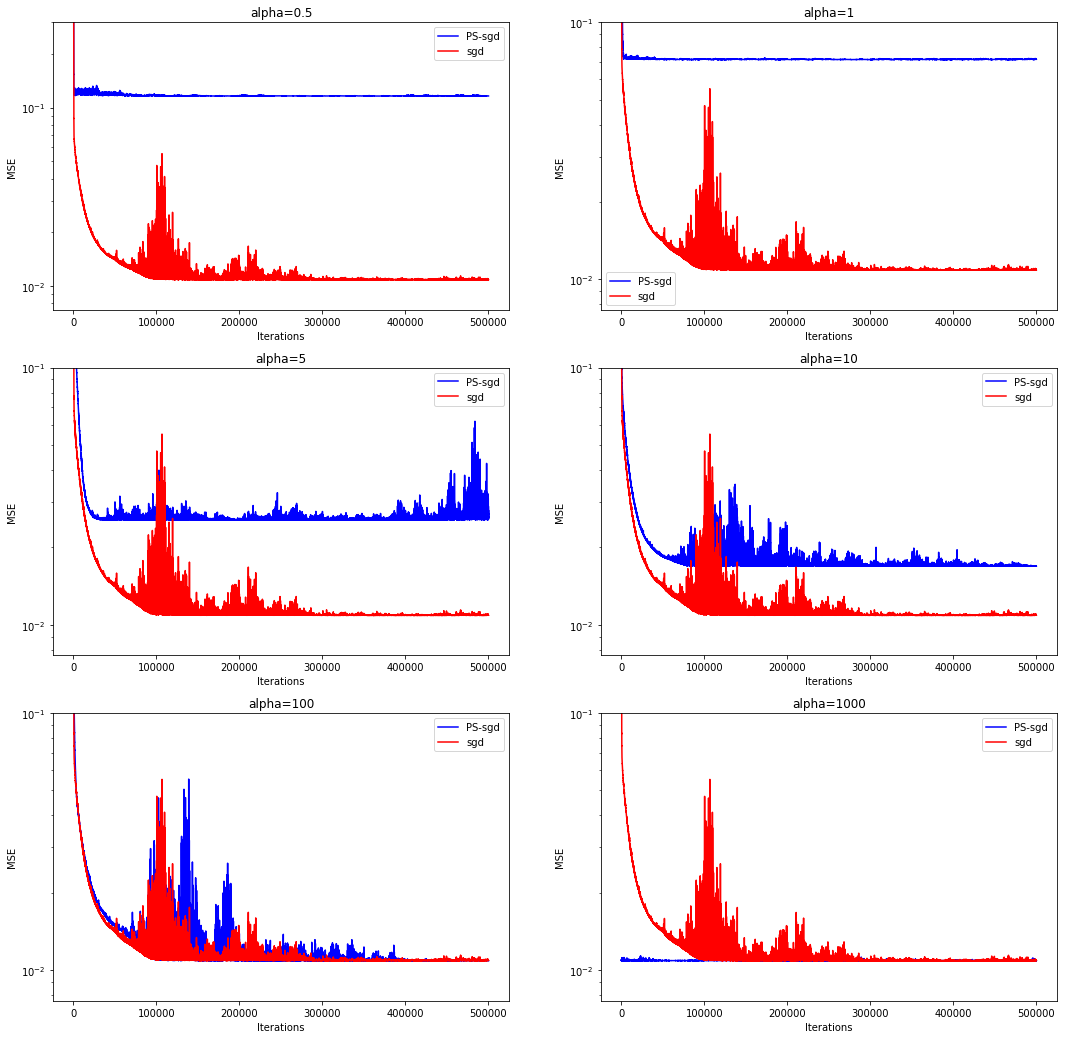

In [63]:
# plt.semilogy(sgd_original_iters[0], sgd_original_array[0], 'r')
# plt.figure()
f = plt.figure(figsize=(18,18))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plt.subplot(2,2,1)
ax1.semilogy(sgd_noise_iters[0], sgd_noise_array[0], 'b', label='PS-sgd')
ax1.semilogy(sgd_original_iters, sgd_original_array, 'r',label='sgd')
ax1.set_title('alpha={}'.format(alpha_noise[0]))
ax1.set_ylim([0,0.3])
ax1.set_xlabel('Iterations')
ax1.set_ylabel('MSE')
ax1.legend()

# plt.subplot(2,2,2)
ax2.semilogy(sgd_noise_iters[1], sgd_noise_array[1], 'b',label='PS-sgd')
ax2.semilogy(sgd_original_iters, sgd_original_array, 'r',label='sgd')
ax2.set_title('alpha={}'.format(alpha_noise[1]))
ax2.set_xlabel('Iterations')
ax2.set_ylabel('MSE')
ax2.set_ylim([0,0.1])
ax2.legend()
# ax2.title(alpha[1])

# plt.subplot(2,2,3)
ax3.semilogy(sgd_noise_iters[2], sgd_noise_array[2], 'b',label='PS-sgd')
ax3.semilogy(sgd_original_iters, sgd_original_array, 'r',label='sgd')
ax3.set_title('alpha={}'.format(alpha_noise[2]))
ax3.set_xlabel('Iterations')
ax3.set_ylabel('MSE')
ax3.set_ylim([0,0.1])
ax3.legend()
# ax3.title(alpha[2])

# plt.subplot(2,2,4)
ax4.semilogy(sgd_noise_iters[3], sgd_noise_array[3], 'b',label='PS-sgd')
ax4.semilogy(sgd_original_iters, sgd_original_array, 'r',label='sgd')
ax4.set_title('alpha={}'.format(alpha_noise[3]))
ax4.set_xlabel('Iterations')
ax4.set_ylabel('MSE')
ax4.set_ylim([0,0.1])
ax4.legend()

ax5.semilogy(sgd_noise_iters[4], sgd_noise_array[4], 'b', label='PS-sgd')
ax5.semilogy(sgd_original_iters, sgd_original_array, 'r',label='sgd')
ax5.set_title('alpha={}'.format(alpha_noise[4]))
ax5.set_xlabel('Iterations')
ax5.set_ylabel('MSE')
ax5.set_ylim([0,0.1])
ax5.legend()

ax6.semilogy(sgd_noise_iters[5], sgd_noise_array[5], 'b', label='PS-sgd')
ax6.semilogy(sgd_original_iters, sgd_original_array, 'r',label='sgd')
ax6.set_title('alpha={}'.format(alpha_noise[5]))
ax6.set_xlabel('Iterations')
ax6.set_ylabel('MSE')
ax6.set_ylim([0,0.1])
ax6.legend()
plt.show()
# ax4.title(alpha[3])
# plt.semilogy(sgd_noise_iters[0], sgd_noise_array[0], 'b')

# plt.semilogy(sgd_noise_iters[0], sgd_noise_array[0], 'g')

# plt.semilogy(sgd_noise_iters[0], sgd_noise_array[0], 'y')

# plt.semilogy(sgd_noise_iters[0], sgd_noise_array[0], 'p')
plt.show()
f.savefig('picture1.pdf')
# plt.legend()

In [65]:
print('Mse for non modificated sgd is {}'.format(mse(X_test@result_original, Y_test)))
for i in [0,1,2,3,4,5]:
    print('Mse for modificated sgd is {} where alpha is {} '.format(mse(X_test@result_noise[i], Y_test), alpha_noise[i]))
# print('Mse for analytical solution is {}'.format(mse(X_test@theta1, Y_test)))

Mse for non modificated sgd is 0.010879465025116096
Mse for modificated sgd is 0.08129731313752431 where alpha is 0.5 
Mse for modificated sgd is 0.04608330618587563 where alpha is 1 
Mse for modificated sgd is 0.01872606664788122 where alpha is 5 
Mse for modificated sgd is 0.012911208840493672 where alpha is 10 
Mse for modificated sgd is 0.010773621732384532 where alpha is 100 
Mse for modificated sgd is 0.010879465025116096 where alpha is 1000 


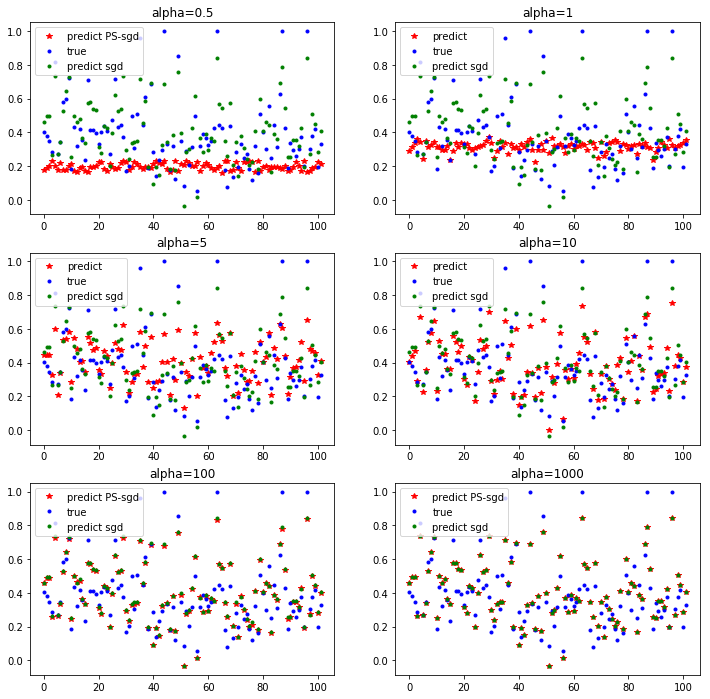

In [66]:
f = plt.figure(figsize=(12,12))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plt.subplot(2,2,1)
ax1.plot(X_test@result_noise[0], 'r.', marker='*', label='predict PS-sgd')
ax1.plot(Y_test, 'b.', label='true')
ax1.plot(X_test@result_original, 'g.', marker='.', label = 'predict sgd')
ax1.set_title('alpha={}'.format(alpha_noise[0]))
ax1.legend()

# plt.subplot(2,2,2)
ax2.plot(X_test@result_noise[1], 'r.', marker='*', label='predict')
ax2.plot(Y_test, 'b.', label='true')
ax2.plot(X_test@result_original, 'g.', marker='.', label = 'predict sgd')
ax2.set_title('alpha={}'.format(alpha_noise[1]))
ax2.legend()
# ax2.title(alpha[1])

# plt.subplot(2,2,3)
ax3.plot(X_test@result_noise[2], 'r.', marker='*', label='predict')
ax3.plot(Y_test, 'b.', label='true')
ax3.plot(X_test@result_original, 'g.', marker='.', label = 'predict sgd')
ax3.set_title('alpha={}'.format(alpha_noise[2]))
ax3.legend()
# ax3.title(alpha[2])

# plt.subplot(2,2,4)
ax4.plot(X_test@result_noise[3], 'r.', marker='*', label='predict')
ax4.plot(Y_test, 'b.', label='true')
ax4.plot(X_test@result_original, 'g.', marker='.', label = 'predict sgd')
ax4.set_title('alpha={}'.format(alpha_noise[3]))
ax4.legend()

ax5.plot(X_test@result_noise[4], 'r.', marker='*', label='predict PS-sgd')
ax5.plot(Y_test, 'b.', label='true')
ax5.plot(X_test@result_original, 'g.', marker='.', label = 'predict sgd')
ax5.set_title('alpha={}'.format(alpha_noise[4]))
ax5.legend()

ax6.plot(X_test@result_noise[5], 'r.', marker='*', label='predict PS-sgd')
ax6.plot(Y_test, 'b.', label='true')
ax6.plot(X_test@result_original, 'g.', marker='.', label = 'predict sgd')
ax6.set_title('alpha={}'.format(alpha_noise[5]))
ax6.legend()
plt.show()
f.savefig('picture2.pdf')